In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
from collections import Counter
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  sklearn.metrics import mean_squared_error 
from numpy import expand_dims

In [2]:
dirr = r'C:\Users\Vinayak Sidharth\Documents\Garbage classification'

In [3]:
files = ['cardboard','glass','metal','paper','plastic','trash']

In [ ]:
#rgb IMAGE CORRECTION IS APPLIED HERE

In [4]:
def convert_folder(path , folder):
    final = []
    ff = os.path.join(path, folder)
    loc = os.listdir(os.path.join(path, folder) )
    n_loc = []
    for i in range(len(loc)):
        n_loc.append(folder+str(i+1)+'.jpg')
        
    if set(n_loc) != set(loc):
        return 0
    
    
    for j in n_loc:
        img = cv2.imread(os.path.join(ff, j),cv2.IMREAD_UNCHANGED )
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        final.append(cv2.resize(RGB_img, (300,300)))
    return np.array(final)

In [5]:
def create_labels(array):
    y_meg = []
    for i,val in enumerate(array):
        y_meg.append(np.full((len(val),),i ))
    return y_meg

In [6]:
def test_sets(x,y,split):
    su= x
    np.random.shuffle(su)
    sp = int(len(su)*split)
    su_ts= su[:sp]
    su_tr = su[sp:]
    y_ts = y[:sp]
    y_tr = y[sp:]
    return su_tr, y_tr, su_ts, y_ts

In [7]:
def combine_shuffle(arr_x, arr_y):
    X = np.concatenate(tuple([arr_x[i] for i in range(len(arr_x))]))
    y = np.concatenate(tuple([arr_y[i] for i in range(len(arr_y))]))
    X,y = shuffle(X,y)
    return X,y

In [8]:
y_unique = np.array([[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1] ])
y_class = [0,1,2,3,4]

In [9]:
cardboard = convert_folder(dirr , files[0])
glass = convert_folder(dirr, files[1])
metal =  convert_folder(dirr, files[2])
paper = convert_folder(dirr, files[3])
plastic = convert_folder(dirr, files[4])

In [10]:
cardboard_y =  create_labels([cardboard,glass,metal,paper,plastic])[0]
glass_y = create_labels([cardboard,glass,metal,paper,plastic])[1]
metal_y =  create_labels([cardboard,glass,metal,paper,plastic])[2]
paper_y = create_labels([cardboard,glass,metal,paper,plastic])[3]
plastic_y = create_labels([cardboard,glass,metal,paper,plastic])[4]

In [11]:
total_size = len(cardboard) + len(glass) + len(metal) + len(paper) + len(plastic) 

In [12]:
split = 0.1
cx_tr , cy_tr, cx_ts, cy_ts = test_sets(cardboard,cardboard_y,split)
gx_tr , gy_tr, gx_ts, gy_ts = test_sets(glass,glass_y,split)
mx_tr , my_tr, mx_ts, my_ts = test_sets(metal,metal_y,split)
px_tr , py_tr, px_ts, py_ts = test_sets(paper,paper_y,split)
lx_tr , ly_tr, lx_ts, ly_ts = test_sets(plastic,plastic_y,split)

In [13]:
tr_x = [cx_tr,gx_tr, mx_tr,px_tr,lx_tr]
tr_y = [cy_tr,gy_tr, my_tr,py_tr,ly_tr]
ts_x = [cx_ts,gx_ts, mx_ts,px_ts,lx_ts]
ts_y = [cy_ts,gy_ts, my_ts,py_ts,ly_ts]

In [14]:
X_train , y_train  = combine_shuffle(tr_x,tr_y)
X_test , y_test = combine_shuffle(ts_x, ts_y)

In [15]:
print("Shape of Xtrain: {}, ytrain : {}, Xtest : {}, ytest : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shape of Xtrain: (2152, 300, 300, 3), ytrain : (2152,), Xtest : (238, 300, 300, 3), ytest : (238,)


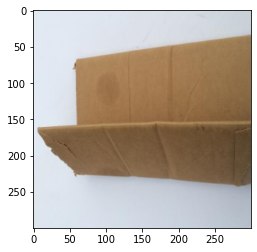

In [16]:
val = 621
dis = {0:'cardboard',1:'glass',2:'metal',3:'paper',4:'plastic'}
plt.imshow(cardboard[0])


In [17]:
cardboard.shape

(403, 300, 300, 3)

In [18]:
Counter(y_train)

Counter({0: 363, 1: 451, 3: 535, 2: 369, 4: 434})

In [19]:
Counter(y_test)

Counter({0: 40, 3: 59, 4: 48, 1: 50, 2: 41})

In [20]:
maxx = np.max(X_train)

In [21]:
x_tsss = X_test/maxx

In [22]:
one = open('xGBtrain_crr.pickle', 'w+b')
pickle.dump(X_train,one)

In [23]:
one_y = open('yGBtrain_crr.pickle', 'w+b')
pickle.dump(y_train,one_y)

In [24]:
two = open('xGBtest_crr.pickle', 'w+b')
pickle.dump(X_test, two)

In [25]:
two_y = open('yGBtest_crr.pickle', 'w+b')
pickle.dump(y_test,two_y)

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
ss = open('xGBtrain_crr.pickle', 'r+b')
xtrain = pickle.load(ss)

EOFError: Ran out of input

In [ ]:
s1 = open('yGBtrain_crr.pickle', 'r+b')
ytrain = pickle.load(s1)

In [ ]:
st = open('xGBtest_crr.pickle', 'r+b')
xtest = pickle.load(st)

In [ ]:
s2 =  open('yGBtest_crr.pickle', 'r+b')
ytest = pickle.load(s2)

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

In [ ]:
ytrain.shape

In [ ]:
ytest.shape

In [ ]:
xtrain = np.array(xtrain)

In [ ]:
X = xtrain/(255.0)

In [ ]:
X.shape

In [ ]:
y = np.array(tf.keras.utils.to_categorical(ytrain) )

In [ ]:
ytrain

In [ ]:
y

In [ ]:
len(X)

In [ ]:
h  =tf.random.normal((30,300,300,3))

In [ ]:
#OLDER MODEL TRAINING PORTION

In [ ]:
path = r'C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5'
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(path , monitor='val_accuracy', save_best_only=True, mode='max', verbose = 1)
callback_list = [checkpoint1]


In [ ]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (4,4), activation = 'relu', ))
model.add(MaxPooling2D(2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (4,4), activation = 'relu' ))
model.add(MaxPooling2D(3))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'] )

In [31]:
model.fit(X, y, validation_split = 0.1, epochs = 10, callbacks = callback_list )

Train on 1936 samples, validate on 216 samples
Epoch 1/10
1920/1936 [============================>.] - ETA: 1s - loss: 2.1763 - accuracy: 0.2380
Epoch 00001: val_accuracy improved from -inf to 0.24074, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5
1936/1936 [==============================] - 189s 98ms/sample - loss: 2.1713 - accuracy: 0.2392 - val_loss: 1.6052 - val_accuracy: 0.2407
Epoch 2/10
1920/1936 [============================>.] - ETA: 1s - loss: 1.5935 - accuracy: 0.2547
Epoch 00002: val_accuracy improved from 0.24074 to 0.25926, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5
1936/1936 [==============================] - 184s 95ms/sample - loss: 1.5929 - accuracy: 0.2557 - val_loss: 1.5901 - val_accuracy: 0.2593
Epoch 3/10
1920/1936 [============================>.] - ETA: 1s - loss: 1.5573 - accuracy: 0.2542
Epoch 00003: val_accuracy improved from 0.25926 to 0.34722, savi

In [32]:
model.fit(X, y, validation_split = 0.1, epochs = 20, callbacks = callback_list )

Train on 1936 samples, validate on 216 samples
Epoch 1/20
1920/1936 [============================>.] - ETA: 1s - loss: 0.9278 - accuracy: 0.6214
Epoch 00001: val_accuracy improved from 0.56019 to 0.59722, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\check2.hdf5
1936/1936 [==============================] - 183s 95ms/sample - loss: 0.9277 - accuracy: 0.6198 - val_loss: 1.1052 - val_accuracy: 0.5972
Epoch 2/20
1920/1936 [============================>.] - ETA: 1s - loss: 0.8612 - accuracy: 0.6510
Epoch 00002: val_accuracy did not improve from 0.59722
1936/1936 [==============================] - 186s 96ms/sample - loss: 0.8607 - accuracy: 0.6513 - val_loss: 1.1076 - val_accuracy: 0.5787
Epoch 3/20
1920/1936 [============================>.] - ETA: 1s - loss: 0.8253 - accuracy: 0.6635
Epoch 00003: val_accuracy did not improve from 0.59722
1936/1936 [==============================] - 187s 97ms/sample - loss: 0.8246 - accuracy: 0.6632 - val_loss: 1.11

In [35]:
model.load_weights(path)

In [36]:
model.save(r'C:\Users\Vinayak Sidharth\Documents\garbagsse2.model')

INFO:tensorflow:Assets written to: C:\Users\Vinayak Sidharth\Documents\garbagsse2.model\assets


In [124]:
len(metal)

410

In [ ]:
#####

In [ ]:
#IMAGE_AUGMANTATION_PART

In [ ]:
#this fuction takes in a set of image arrays and outputs 5 images (including the input) inplace of 1 image.

In [11]:
def augment_img(arr):
    gen = ImageDataGenerator(rotation_range = 360, zoom_range = [0.3,1])
    bath_img = []
    
    for ss,a in enumerate(arr):
        a_s = a
        a = expand_dims(a, 0)
        ce_img = []
        mse_val = {}
        it = gen.flow(a, batch_size = 1)
        
        for i in range(16):
            thi = it.next()[0]
            ce_img.append(thi)


        y = np.array(ce_img)
        nu = np.array(a[0])
        y = y.reshape(y.shape[0],y.shape[1]*y.shape[2]*y.shape[3])
        nu = nu.reshape(nu.shape[0]*nu.shape[1]*nu.shape[2],)

        for i in range(len(y)):
            mse_val[i] = mean_squared_error(y[i],nu )


        ce_img = np.array(ce_img)   
        sorr = {k: v for k, v in sorted(mse_val.items(), key=lambda item: item[1], reverse = True)}
        
        wan  = []
        wan.append(list(sorr.keys() )[0])
        wan.append(list(sorr.keys())[8])
        wan.append(list(sorr.keys())[4])
        wan.append(list(sorr.keys() )[-1])
        wan = np.array(wan)
        
        cee = ce_img[wan]
        cee = np.append(cee, [a_s], axis = 0)
        bath_img.append(cee)
        
        if ss%25 ==0:
            print(ss)
        
    return bath_img

In [14]:
metal_ag = augment_img(metal)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400


In [15]:
cc = open('please.pickle', 'w+b')
pickle.dump(metal_ag,cc)

In [16]:
cardboard_ag = augment_img(cardboard)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400


In [17]:
cc2 = open('carrr.pickle', 'w+b')
pickle.dump(cardboard_ag,cc2)

In [32]:
glass_ag = augment_img(glass)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500


In [12]:
paper_ag = augment_img(paper)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575


In [21]:
plastic = augment_img(plastic)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475


In [17]:
def conv_arg(arr):
    arr = np.array(arr)
    arr = arr.reshape(arr.shape[0]*arr.shape[1],300,300,3)
    return arr

In [22]:
pl = conv_arg(plastic)

In [29]:
ca = conv_arg(cardboard_ag)

In [24]:
ma = conv_arg(metal_ag)

In [33]:
ga = conv_arg(glass_ag)

In [18]:
pa = conv_arg(paper_ag)

In [47]:
ma.shape

(2050, 300, 300, 3)

In [45]:
pl.shape

(2410, 300, 300, 3)

In [ ]:
car = np.array(cardboard_ag)

In [132]:
np.array(metal_ag).shape

(410, 5, 300, 300, 3)

In [109]:
ppp = augment_img(metal[:3])

In [110]:
p = np.array(ppp)

In [111]:
p.shape

(3, 5, 300, 300, 3)

In [31]:
das = pl[1]

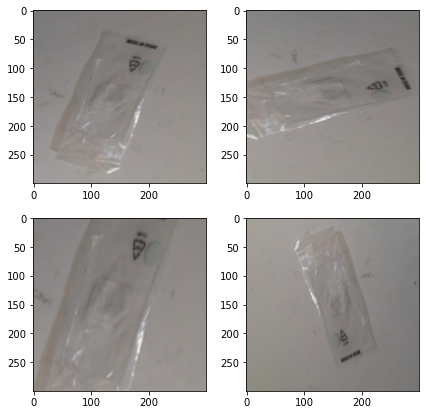

In [32]:
fg ,ax = plt.subplots(2,2, figsize=(7,7))
for i,ax in enumerate(ax.flat):
    ax.imshow(das[i].astype('uint8') )

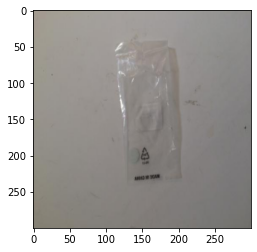

In [33]:
plt.imshow(das[-1].astype('uint8'))

In [19]:
pp = np.array([2,1,3,4])

In [20]:
np.save('samecym', pp)

In [25]:
np.save('toose',ma)

In [27]:
kk = np.load('toose.npy')

In [28]:
kk.shape

(2050, 300, 300, 3)

In [30]:
np.save('carddbo', ca)

In [31]:
np.load('carddbo.npy').shape

(2015, 300, 300, 3)

In [34]:
np.save('galssWW', ga)

In [36]:
np.load('galssWW.npy').shape

(2505, 300, 300, 3)

In [19]:
np.save('pa', pa)

In [20]:
np.load('pa.npy').shape

(2970, 300, 300, 3)

In [23]:
np.save('pll', pl)

In [24]:
np.load('pll.npy').shape

(2410, 300, 300, 3)